In [1]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#数据加载:
#数据集：jetrail.csv，根据过往两年的数据（2012 年 8 月至 2014 年 8月），预测接下来 7 个月的乘客数量Datetime:日期，Count:高铁乘客数量
df = pd.read_csv('./train.csv',index_col = 0)
print(df.shape)
df.head()

(18288, 2)


,Datetime,Count
ID,,
0,25-08-2012 00:00,8
1,25-08-2012 01:00,2
2,25-08-2012 02:00,6
3,25-08-2012 03:00,2
4,25-08-2012 04:00,2


In [6]:
# 数据预处理
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.set_index('Datetime',inplace = True)
df.head()

,Count
Datetime,
2012-08-25 00:00:00,8
2012-08-25 01:00:00,2
2012-08-25 02:00:00,6
2012-08-25 03:00:00,2
2012-08-25 04:00:00,2


In [7]:
#按天统计人数
df_daily = df.resample('D').sum()
print(df_daily)

            Count
Datetime         
2012-01-09    112
2012-01-10    248
2012-01-11    304
2012-01-12    210
2012-01-13      0
...           ...
2014-12-05   6826
2014-12-06   7540
2014-12-07   5858
2014-12-08  14762
2014-12-09   9010

[1066 rows x 1 columns]


In [8]:
#设置训练数据
df_daily['ds'] = df_daily.index
df_daily['y'] = df_daily.Count
df_daily.drop(['Count'],axis =1,inplace =True)
print(df_daily)

                   ds      y
Datetime                    
2012-01-09 2012-01-09    112
2012-01-10 2012-01-10    248
2012-01-11 2012-01-11    304
2012-01-12 2012-01-12    210
2012-01-13 2012-01-13      0
...               ...    ...
2014-12-05 2014-12-05   6826
2014-12-06 2014-12-06   7540
2014-12-07 2014-12-07   5858
2014-12-08 2014-12-08  14762
2014-12-09 2014-12-09   9010

[1066 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


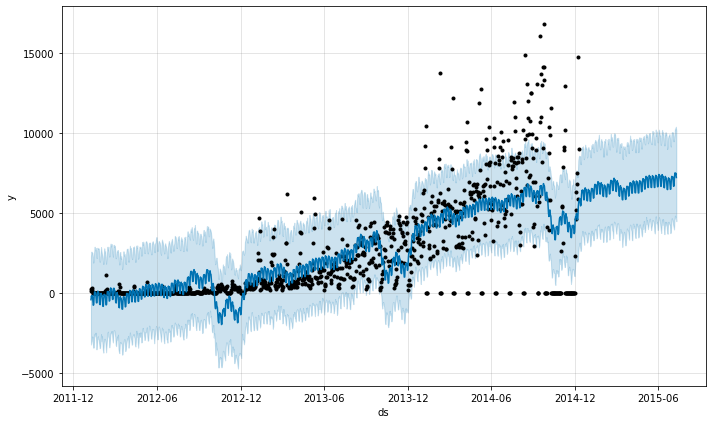

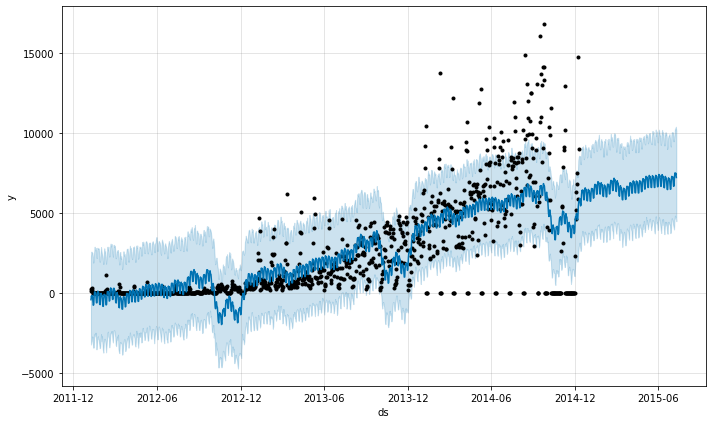

In [9]:
m = Prophet(yearly_seasonality = True,seasonality_prior_scale = 0.1)
m.fit(df_daily)
# 预测未来7个月，213天
future = m.make_future_dataframe(periods = 213)
# 预测
forecast = m.predict(future)
m.plot(forecast)

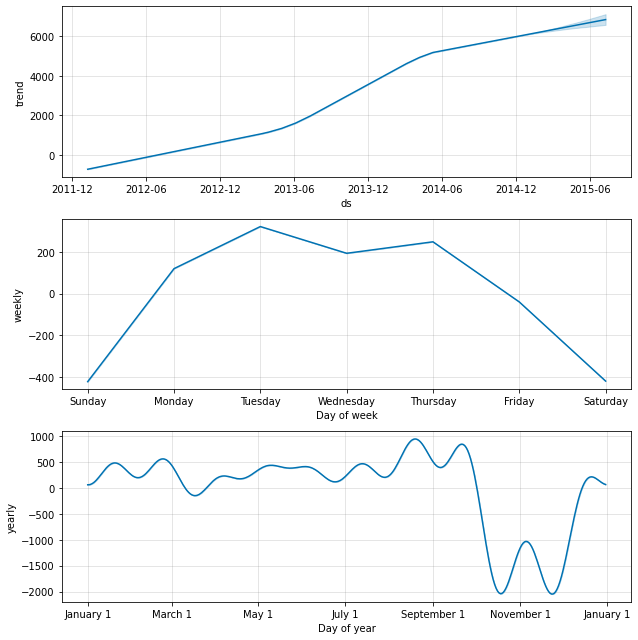

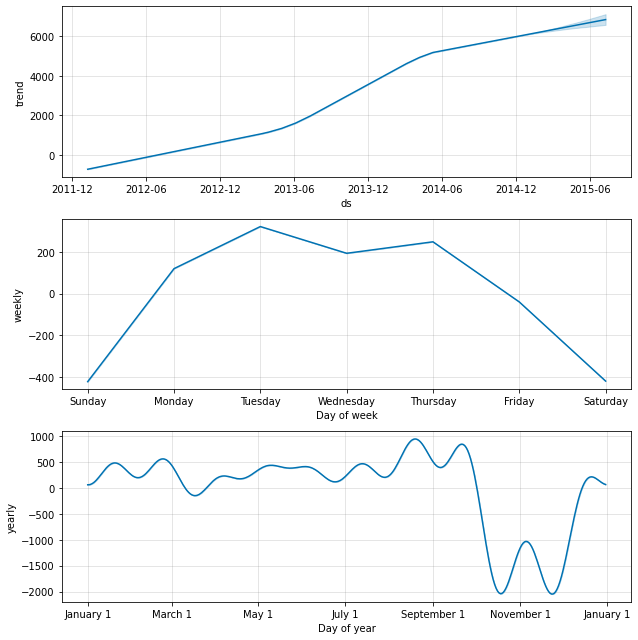

In [10]:
m.plot_components(forecast)